In [1]:
import requests
import json
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df=pd.read_csv('FINAL.csv')
df=df.drop(['Unnamed: 0'],axis=1)

In [2]:
planeswalker_df=df[df.types=='Planeswalker']

In [3]:
planeswalker_df=planeswalker_df.sort_values('name')

In [4]:
planes_foil=planeswalker_df[planeswalker_df.hasFoil==1]

In [5]:
legendary_df=df[(df.supertypes=='Legendary')&(df.types=='Creature')]

In [6]:
legendary_df=legendary_df[legendary_df.hasFoil==1]

In [7]:
legendary_df=legendary_df.sort_values('name')

In [8]:
legendary_df.reset_index(inplace=True)
planes_foil.reset_index(inplace=True)

In [9]:
other_df=df.query('types!="Creature" and supertypes!="Legendary"')

# data.query('Senior_Management == True 
#             and Gender =="Male" and Team =="Marketing" 
#             and First_Name =="Johnny"', inplace = True)

In [10]:
other_df=other_df.query('hasFoil==1')

In [11]:
other_df.query('supertypes!="Planeswalker"',inplace=True)

In [16]:
other_foil=other_df[['name','setCode','rarity','types','TCGPlayer_Foil_Price','TCGPlayer_Foil_Change','TCGPlayer_Foil_BLPrice','TCGPlayer_Foil_Profit','edhrecRank']]
other_normal=other_df[['name','setCode','rarity','types','TCGPlayer_Norm_Price','TCGPlayer_Norm_Change','TCGPlayer_Norm_BLPrice','TCGPlayer_Norm_Profit','edhrecRank']]

In [24]:
other_foil.dropna(inplace=True)

/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
other_normal.dropna(inplace=True)

/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
other_foil.count()

name                      11036
setCode                   11036
rarity                    11036
types                     11036
TCGPlayer_Foil_Price      11036
TCGPlayer_Foil_Change     11036
TCGPlayer_Foil_BLPrice    11036
TCGPlayer_Foil_Profit     11036
edhrecRank                11036
dtype: int64

In [53]:
# calculating the standard deviation and t-test of the samples
ofmean=np.mean(other_foil.TCGPlayer_Foil_Profit)
cfmean=np.mean(foils.TCGPlayer_Foil_Profit)

foiln=other_foil.TCGPlayer_Foil_Profit
foilc=foils.TCGPlayer_Foil_Profit

stdn=np.std(foiln)
stdc=np.std(foilc)

stats.ttest_ind_from_stats(mean1=ofmean,std1=stdn,nobs1=len(other_foil),
                          mean2=cfmean,std2=stdc,nobs2=len(foils))

Ttest_indResult(statistic=-8.792216310822186, pvalue=1.648166059851758e-18)

In [58]:
onmean=np.mean(other_normal.TCGPlayer_Norm_Profit)
cnmean=np.mean(normal.TCGPlayer_Norm_Profit)

normn=other_normal.TCGPlayer_Norm_Profit
normc=normal.TCGPlayer_Norm_Profit

stdn=np.std(normn)
stdc=np.std(normc)

stats.ttest_ind_from_stats(mean1=onmean,std1=stdn,nobs1=len(other_normal),
                          mean2=cnmean,std2=stdc,nobs2=len(normal))

Ttest_indResult(statistic=-16.088787185488087, pvalue=1.3572386834784576e-57)

In [56]:
ofmean=np.mean(other_foil.TCGPlayer_Foil_Change)
cfmean=np.mean(foils.TCGPlayer_Foil_Change)

foiln=other_foil.TCGPlayer_Foil_Change
foilc=foils.TCGPlayer_Foil_Change

stdn=np.std(foiln)
stdc=np.std(foilc)

stats.ttest_ind_from_stats(mean1=ofmean,std1=stdn,nobs1=len(other_foil),
                          mean2=cfmean,std2=stdc,nobs2=len(foils))

Ttest_indResult(statistic=3.6403556285371783, pvalue=0.00027331322437496437)

In [57]:
onmean=np.mean(other_normal.TCGPlayer_Norm_Change)
cnmean=np.mean(normal.TCGPlayer_Norm_Change)

normn=other_normal.TCGPlayer_Norm_Change
normc=normal.TCGPlayer_Norm_Change

stdn=np.std(normn)
stdc=np.std(normc)

stats.ttest_ind_from_stats(mean1=cnmean,std1=stdc,nobs1=len(normal),
                          mean2=onmean,std2=stdn,nobs2=len(other_normal))

Ttest_indResult(statistic=-2.204281063717118, pvalue=0.027524930076921545)

In [34]:
df_new=pd.concat([legendary_df,planes_foil])

In [35]:
df_new.sort_values(by=['TCGPlayer_Foil_Profit','TCGPlayer_Foil_Change'],ascending=False)

,index,name,setCode,rarity,convertedManaCost,edhrecRank,hasFoil,originalReleaseDate,types,supertypes,TCGPlayer_Norm_Price,TCGPlayer_Foil_Price,TCGPlayer_Norm_Change,TCGPlayer_Foil_Change,TCGPlayer_Norm_BLPrice,TCGPlayer_Foil_BLPrice,TCGPlayer_Foil_Profit,TCGPlayer_Norm_Profit
256,5117,"Jace, the Mind Sculptor",WWK,mythic,4.0,932.0,1,NaN,Planeswalker,Legendary,88.63,489.99,-0.0262,NaN,59.65,337.60,90.0,17.0
294,2876,"Elesh Norn, Grand Cenobite",J14,rare,7.0,413.0,1,NaN,Creature,Legendary,NaN,253.01,NaN,0.4132,0.00,135.17,85.0,0.0
254,5115,"Jace, the Mind Sculptor",A25,mythic,4.0,932.0,1,NaN,Planeswalker,Legendary,58.79,139.22,-0.2711,-0.0857,37.35,56.01,65.0,14.0
324,6296,Liliana of the Dark Realms,PSDC,mythic,4.0,1278.0,1,NaN,Planeswalker,Legendary,NaN,210.77,NaN,0.0689,0.00,120.00,64.0,0.0
554,6471,"Jace, Vryn's Prodigy // Jace, Telepath Unbound",PS15,mythic,2.0,1331.0,1,NaN,Creature,Legendary,NaN,183.37,NaN,0.1190,0.00,101.85,58.0,0.0
1311,24157,"Tahngarth, Talruum Hero",PLS,rare,5.0,8763.0,1,NaN,Creature,Legendary,NaN,140.99,NaN,NaN,0.00,67.27,55.0,0.0
299,13019,"Kaya, Ghost Assassin",CN2,mythic,4.0,3638.0,1,NaN,Planeswalker,Legendary,NaN,174.25,NaN,0.0834,0.00,100.12,52.0,0.0
1446,4002,"Ulamog, the Ceaseless Hunger",PBFZ,mythic,10.0,656.0,1,NaN,Creature,Legendary,NaN,128.33,NaN,0.7436,0.00,61.01,51.0,0.0
255,5116,"Jace, the Mind Sculptor",EMA,mythic,4.0,932.0,1,NaN,Planeswalker,Legendary,70.60,155.00,0.0338,0.0001,42.36,89.57,45.0,19.0
105,3479,"Avacyn, Angel of Hope",J17,mythic,8.0,538.0,1,NaN,Creature,Legendary,NaN,124.10,NaN,-0.0582,0.00,62.68,45.0,0.0


In [36]:
foils=df_new[['name','setCode','rarity','types','TCGPlayer_Foil_Price','TCGPlayer_Foil_Change','TCGPlayer_Foil_BLPrice','TCGPlayer_Foil_Profit','edhrecRank']]
normal=df_new[['name','setCode','rarity','types','TCGPlayer_Norm_Price','TCGPlayer_Norm_Change','TCGPlayer_Norm_BLPrice','TCGPlayer_Norm_Profit','edhrecRank']]

In [37]:
foils.sort_values('TCGPlayer_Foil_Change',ascending=False)

,name,setCode,rarity,types,TCGPlayer_Foil_Price,TCGPlayer_Foil_Change,TCGPlayer_Foil_BLPrice,TCGPlayer_Foil_Profit,edhrecRank
1392,The Unspeakable,CHK,rare,Creature,3.45,3.7260,1.39,1.0,10215.0
1616,Zur the Enchanter,OCM1,rare,Creature,11.00,2.5948,4.34,5.0,1863.0
354,Lord Windgrace,OC18,mythic,Planeswalker,1.93,2.5741,0.66,1.0,1433.0
1018,"Omnath, Locus of the Roil",M20,mythic,Creature,22.88,2.2968,12.14,8.0,2405.0
4,Admiral Beckett Brass,XLN,mythic,Creature,14.44,1.8258,4.89,7.0,4519.0
1019,"Omnath, Locus of the Roil",PM20,mythic,Creature,15.40,1.7402,8.98,4.0,2405.0
837,"Marisi, Breaker of the Coil",C19,mythic,Creature,3.32,1.6560,1.16,1.0,2088.0
833,"Mannichi, the Fevered Dream",BOK,rare,Creature,3.45,1.5368,1.52,1.0,12391.0
1525,"Vorosh, the Hunter",PLC,rare,Creature,9.00,1.5352,5.14,2.0,6196.0
1169,"Ruric Thar, the Unbowed",GK2,rare,Creature,3.59,1.4589,1.28,2.0,1315.0


In [38]:
foils.dropna(inplace=True)

/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
normal.dropna(inplace=True)

/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


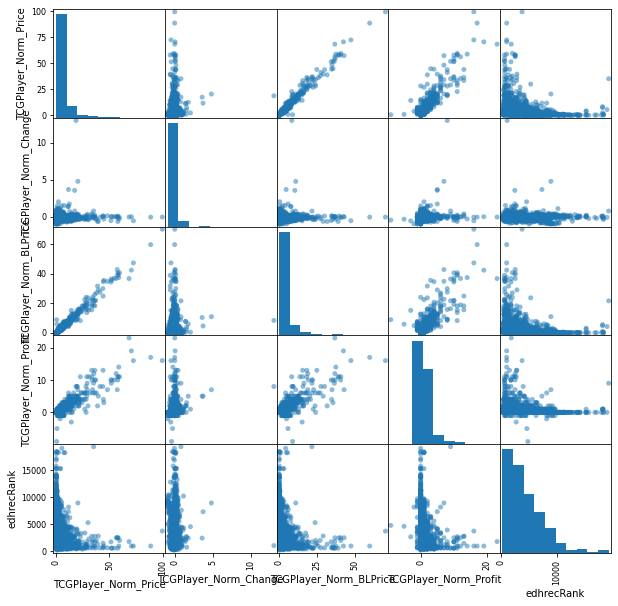

In [40]:
pd.plotting.scatter_matrix(normal, figsize=(10, 10), s=100);

In [ ]:
pd.plotting.scatter_matrix(foils, figsize=(10, 10), s=100);

In [ ]:
foils.info()

In [ ]:
normal.info()

In [ ]:
foils.plot.scatter(x='TCGPlayer_Foil_Change',

                      y='edhrecRank',

                      c='DarkBlue')

In [ ]:
normal.plot.scatter(x='TCGPlayer_Norm_Change',

                      y='edhrecRank',

                      c='DarkBlue')

In [ ]:
# price change vs price
# looks like the higher the price of the card the less volatility in the price
foils.plot.scatter(x='TCGPlayer_Foil_Price',

                      y='TCGPlayer_Foil_Change',

                      c='DarkBlue')

In [ ]:
# price change vs 
normal.plot.scatter(x='TCGPlayer_Norm_Price',

                      y='TCGPlayer_Norm_Change',

                      c='DarkBlue')

In [ ]:
#Price of normal cards in the sample vs the profit that could be made
# for the most part it is what I expected to see. The higher the card price the greater potential for profit

normal.plot.scatter(x='TCGPlayer_Norm_Price',

                      y='TCGPlayer_Norm_Profit',

                      c='DarkBlue')

In [ ]:
# Price of a normal card in the sample vs the profit that could be made
# for the most part it is what I expected to see. The higher the card price the greater potential for profit.

foils.plot.scatter(x='TCGPlayer_Foil_Price',

                      y='TCGPlayer_Foil_Profit',

                      c='DarkBlue')

Interesting that there are negative profit numbers for normal cards and foil cards in the data sample. This probably indicates a supply problem. Some stores are selling cards for less than other stores are buying cards for. Maybe they are buying cards to hold, predicting the price of this card going up in the future?

In [ ]:
foils.plot.scatter(x='TCGPlayer_Foil_Profit',

                      y='TCGPlayer_Foil_Change',

                      c='DarkBlue')

In [ ]:
normal.plot.scatter(x='TCGPlayer_Norm_Profit',

                      y='TCGPlayer_Norm_Change')

In [ ]:
def emperical_distribution(x, data):
    weight = 1.0 / len(data)
    count = np.zeros(shape=len(x))
    for datum in data:
        count = count + np.array(x >= datum)
    return weight * count

def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    ## why jitter? especially for bootstraping later
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    mean = np.mean(data)
    ax.scatter([mean], 0, c="black", s=80)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])
    ax.tick_params(axis='both', which='major', labelsize=15)

In [ ]:
data=foils.TCGPlayer_Foil_Change
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

x = np.linspace(-3, 3, num=250)
ax[0].plot(x, emperical_distribution(x, data), linewidth=2)
ax[0].set_ylim(-0.05, 1.05)
ax[0].set_xlim(-2, 2)
# ax[0].tick_params(axis='both', which='major', labelsize=15)
one_dim_scatterplot(data, ax[1], s=25)
_ = ax[0].set_title("The Empirical Distribution Function for Foil Price Change")
print(f'The mean of the data is:{np.mean(data)}')

In [ ]:
data=normal.TCGPlayer_Norm_Change
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

x = np.linspace(-3, 3, num=250)
ax[0].plot(x, emperical_distribution(x, data), linewidth=2)
ax[0].set_ylim(-0.05, 1.05)
ax[0].set_xlim(-2, 2)
# ax[0].tick_params(axis='both', which='major', labelsize=15)
one_dim_scatterplot(data, ax[1], s=25)
_ = ax[0].set_title("The Empirical Distribution Function for Normal Card Price Change")
print(f'The mean of the data is:{np.mean(data)}')